In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [11]:
# Create an empty list to hold the weather data.
city_data = []
url = "Http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | vaitape
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | flin flon
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | kenora
Processing Record 11 of Set 1 | plaisance-du-touch
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | tripoli
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | kendari
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | avarua
Proce

In [12]:
len(city_data)

559

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,52.92,49,70,4.00,AU,2021-10-30 00:00:34
1,Georgetown,5.4112,100.3354,80.53,88,20,3.00,MY,2021-10-29 23:58:34
2,Kodiak,57.7900,-152.4072,44.11,87,90,18.41,US,2021-10-29 23:59:05
3,Qaanaaq,77.4840,-69.3632,13.41,70,100,7.76,GL,2021-10-29 23:57:55
4,Busselton,-33.6500,115.3333,57.04,63,5,7.45,AU,2021-10-30 00:00:34
5,Vaitape,-16.5167,-151.7500,78.89,72,88,15.97,PF,2021-10-30 00:00:35
6,Taltal,-25.4000,-70.4833,63.63,71,22,4.72,CL,2021-10-29 23:58:32
7,Flin Flon,54.7682,-101.8650,38.66,58,83,3.60,CA,2021-10-30 00:00:35
8,Barrow,71.2906,-156.7887,1.42,71,1,12.66,US,2021-10-30 00:00:36
9,Kenora,49.8167,-94.4337,46.38,93,24,5.99,CA,2021-10-30 00:00:36


In [14]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp', 'Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-10-30 00:00:34,-42.7826,147.0587,52.92,49,70,4.00
1,Georgetown,MY,2021-10-29 23:58:34,5.4112,100.3354,80.53,88,20,3.00
2,Kodiak,US,2021-10-29 23:59:05,57.7900,-152.4072,44.11,87,90,18.41
3,Qaanaaq,GL,2021-10-29 23:57:55,77.4840,-69.3632,13.41,70,100,7.76
4,Busselton,AU,2021-10-30 00:00:34,-33.6500,115.3333,57.04,63,5,7.45
5,Vaitape,PF,2021-10-30 00:00:35,-16.5167,-151.7500,78.89,72,88,15.97
6,Taltal,CL,2021-10-29 23:58:32,-25.4000,-70.4833,63.63,71,22,4.72
7,Flin Flon,CA,2021-10-30 00:00:35,54.7682,-101.8650,38.66,58,83,3.60
8,Barrow,US,2021-10-30 00:00:36,71.2906,-156.7887,1.42,71,1,12.66
9,Kenora,CA,2021-10-30 00:00:36,49.8167,-94.4337,46.38,93,24,5.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.sdfsdf
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

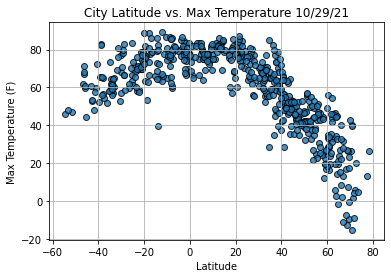

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

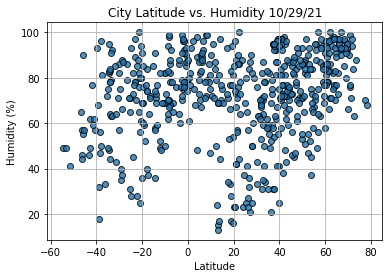

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

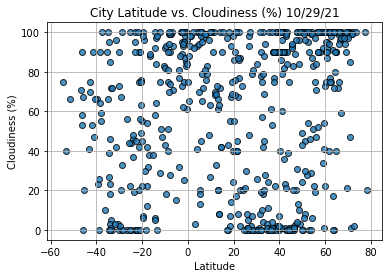

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

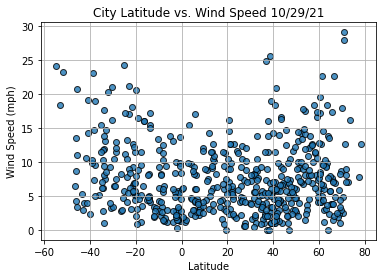

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hem_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hem_df = city_data_df.loc[(city_data_df['Lat']<0)]

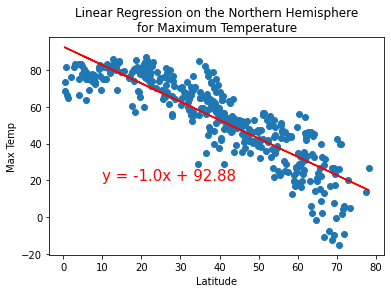

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,20))


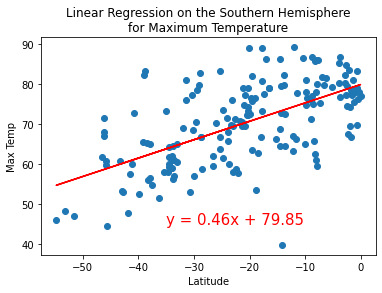

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-35,45))

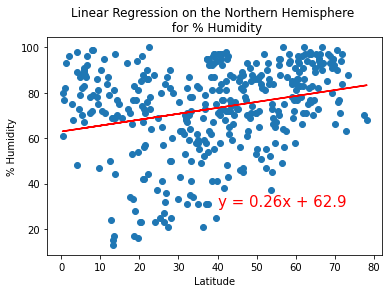

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,30))

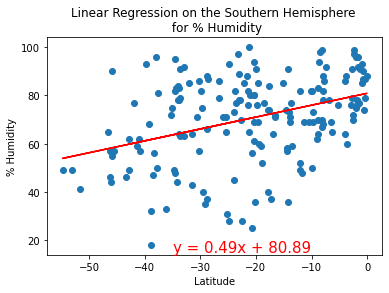

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-35,15))

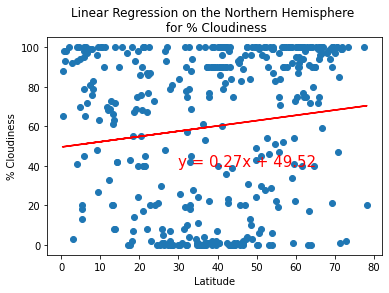

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(30,40))

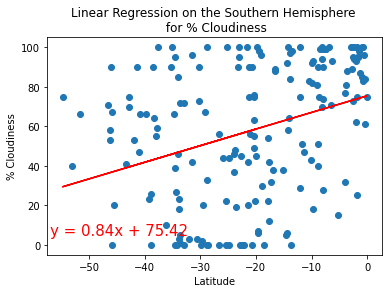

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,5))

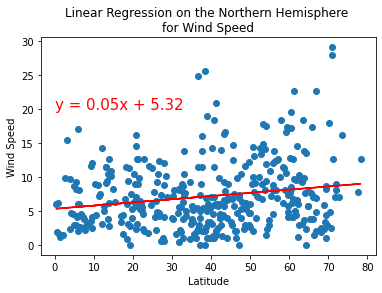

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(0,20))

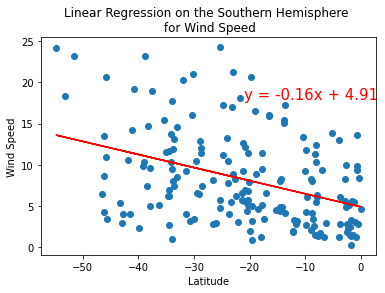

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-21,18))